In [ ]:
import tensorflow as tf
import os
import cv2
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X_train=[]
Y_train=[]
image_size=150
labels=['daisy','dandelion','rose','sunflower','tulip']
for elem in labels:
    folderPath=os.path.join('/content/drive/MyDrive/Assigments/flowers',elem)
    for i in os.listdir(folderPath):
        img=cv2.imread(os.path.join(folderPath,i))
        if img is None : continue
        img=cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(elem)

In [ ]:
X_train=np.array(X_train)
Y_train=np.array(Y_train)

In [ ]:
from sklearn.utils import shuffle

In [ ]:
X_train,Y_train=shuffle(X_train,Y_train,random_state=101)

In [ ]:
from sklearn. model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.2,random_state=101)

In [ ]:
y_train_new=[]
for i in Y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train=tf.keras.utils.to_categorical(y_train)

In [ ]:
cnn=tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[150,150,3]))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[150,150,3]))

In [ ]:
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[150,150,3]))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[150,150,3]))

In [ ]:
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu',input_shape=[150,150,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu',input_shape=[150,150,3]))

In [ ]:
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=5,activation='softmax'))

In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=cnn.fit(X_train,y_train,epochs=5)

Epoch 1/5
109/109 [==============================] - 630s 6s/step - loss: 1.4526 - accuracy: 0.3658
Epoch 2/5
109/109 [==============================] - 623s 6s/step - loss: 1.2449 - accuracy: 0.4936
Epoch 3/5
109/109 [==============================] - 627s 6s/step - loss: 1.0463 - accuracy: 0.5940
Epoch 4/5
109/109 [==============================] - 631s 6s/step - loss: 0.8261 - accuracy: 0.6868
Epoch 5/5
109/109 [==============================] - 632s 6s/step - loss: 0.6155 - accuracy: 0.7802


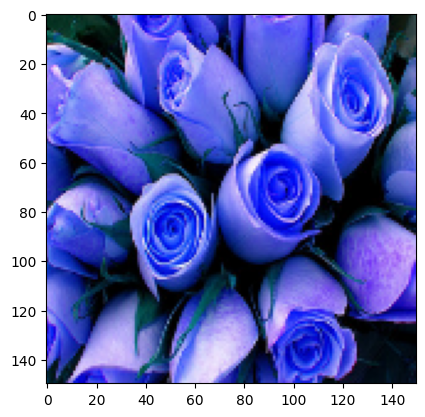

In [ ]:
import matplotlib.pyplot as plt
path=('/content/drive/MyDrive/Assigments/flowers/rose/118974357_0faa23cce9_n.jpg')
img=cv2.imread(path)
img=cv2.resize(img,(150,150))
img=np.array(img)
plt.imshow(img)
plt.show()
img=img.reshape(1,150,150,3)

In [ ]:
result=cnn.predict(img)

1/1 [==============================] - 0s 66ms/step


In [ ]:
i=result.argmax()
print(labels[i])

rose
